In [1]:
import os
import sys
import urllib.request
import json

#필요 데이터 설정
client_id = "vKaPzWy9SxfKMNgpCnAV"
client_secret = "IPV7F5oYWM"
const_url = "https://openapi.naver.com/v1/search/news?query="
const_start = 1
const_display = 10
keyword = input("검색어를 입력하세용 :")

#######################################################
#검색 결과 전체
def searchNaverNews(keyword, start, display):
    encText = urllib.parse.quote(keyword)
    reqUrl = const_url + f"{encText}&start={start}&display={display}"
    request = urllib.request.Request(reqUrl)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    result_json = None
    
    try:
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        
        if(rescode==200):
            response_body = response.read().decode('utf-8')
            result_json = json.loads(response_body)
            
            idx = 0
            
            for item in result_json['items']:
                item['index'] = idx
                idx += 1
                
    except Exception as e:
        print(e)
        print(f"Error : {reqUrl}")
        
    return result_json


#######################################################
#검색결과 부분만 추리기
def setNewSearchResult(json_result):
    return json_result['items']


#######################################################
#정리된 파일 json파일로 저장
def saveSearchResult(filename, list_result_all):
    with open(filename, "w", encoding="utf8") as outfile:
        json_string = json.dumps(list_result_all, ensure_ascii=False, indent=4)
        outfile.write(json_string)
        print(f"{filename} 저장완료!")


#######################################################
#검색+정규화
def makeRegular()

검색어를 입력하세용 :오뉴월


In [2]:
#######################################################
#검색+정규화
import re

total_result = ''
start = const_start
display = const_display

json_result = searchNaverNews(keyword, start, display)
data = setNewSearchResult(json_result)

for item in data:
    clean_data = re.sub(r'[\W]', ' ', item['description'])
    total_result += clean_data
total_result

' b 오뉴월  b  겻불 그럼 나는 어찌해서 소농직불금 120만 원을 받다가 못 받게 된 것일까 생각해 봤다  일단 농지    그것도 받다가 못 받게 된다고 생각하니    b 오뉴월  b  겻불도 쬐다 말면 섭섭하다고   아쉬운 마음이 든다  5  우리의    60년생  b 오뉴월  b  엿가락처럼 몸도 마음도 축축 처지니 휴식을 취하라  48  36년생 엄한 사람을 붙잡고 귀한 시간을 허비할 수 있다  운세지수 43   금전 45 건강 45 애정 40 오늘의 소 丑 띠 운세   gt 97  85년생 문이 활짝    60년생  b 오뉴월  b  엿가락처럼 몸도 마음도 축축 처지니 휴식을 취하라  48  36년생 엄한 사람을 붙잡고 귀한 시간을 허비할 수 있다  운세지수 43   금전 45 건강 45 애정 40  소띠  97  85년생 문이 활짝 열리는 운세이니    60년생  b 오뉴월  b  엿가락처럼 몸도 마음도 축축 처지니 휴식을 취하라  48  36년생 엄한 사람을 붙잡고 귀한 시간을 허비할 수 있다  운세지수 43   금전 45  건강 45  애정 40  소띠  97  85년생 문이 활짝 열리는 운세이니    구 PD는  quot 벚꽃이 피는 시기가 빨라지거나 아예 매화와 같은 시기에 개화한다든지 매미 소리가  b 오뉴월  b 에 들리는 걸 목격하면서 자연이 변화하는 것을 느꼈다 quot 고 떠올렸다  이어  quot 기후 변화가 중요한 의제인데도 그    서준호  b 오뉴월  b  대표  동양일보 나는 지난 7월 14일부터 8월 13일까지 전주문화재단의 의뢰로 동아시아문화도시 프로그램의 일환으로 한중일 현대미술 교류전을 진행했다  그 전시를 준비하던 중 5월 초 충북문화재단의    자식 된 도리로 라며 후회하자 장숙향은   b 오뉴월  b 에 감기 걸린 개 같은 소리 하지 마라  당신 나 아니었으면 회장 못 됐고 감옥 갔다  태민이 대신 보내자는 아이디어 당신 머리에서 나왔을 것 같냐 며 시모 최명희를     b 오뉴월  b  소속 김재민이 작가는

In [3]:
#######################################################
#품사 태깅 : 명사추출
from konlpy.tag import Okt

okt = Okt()
total_result_noun = okt.nouns(total_result)
total_result_noun

['오뉴월',
 '겻불',
 '나',
 '어찌',
 '소농',
 '직',
 '불금',
 '원',
 '못',
 '것',
 '생각',
 '일단',
 '농지',
 '그것',
 '못',
 '생각',
 '오뉴월',
 '겻불',
 '말',
 '마음',
 '우리',
 '오뉴월',
 '가락',
 '몸',
 '마음',
 '휴식',
 '취하',
 '엄',
 '사람',
 '시간',
 '수',
 '운세',
 '지수',
 '금전',
 '건강',
 '애정',
 '오늘',
 '소',
 '띠',
 '운세',
 '문',
 '활짝',
 '오뉴월',
 '가락',
 '몸',
 '마음',
 '휴식',
 '취하',
 '엄',
 '사람',
 '시간',
 '수',
 '운세',
 '지수',
 '금전',
 '건강',
 '애정',
 '띠',
 '문',
 '활짝',
 '운세',
 '오뉴월',
 '가락',
 '몸',
 '마음',
 '휴식',
 '취하',
 '엄',
 '사람',
 '시간',
 '수',
 '운세',
 '지수',
 '금전',
 '건강',
 '애정',
 '띠',
 '문',
 '활짝',
 '운세',
 '구',
 '벚꽃',
 '시기',
 '빨',
 '거나',
 '아예',
 '매화',
 '시기',
 '개화',
 '매미',
 '소리',
 '오뉴월',
 '걸',
 '목격',
 '자연',
 '변화',
 '것',
 '고',
 '기후',
 '변화',
 '의제',
 '도',
 '그',
 '서준호',
 '오뉴월',
 '대표',
 '동양',
 '일보',
 '나',
 '지난',
 '문화재단',
 '의뢰',
 '동아시아',
 '문화',
 '도시',
 '프로그램',
 '일환',
 '한중일',
 '현대',
 '미술',
 '교류',
 '전',
 '진행',
 '그',
 '전시',
 '준비',
 '중',
 '초',
 '충북',
 '문화재단',
 '자식',
 '도리',
 '라며',
 '후회',
 '장숙',
 '향',
 '오뉴월',
 '감기',
 '개',
 '소리',
 '당신',
 '나',
 '회장',
 '못',
 '감옥',
 '태민',

In [8]:
#######################################################
#빈도 탐색 후 조건부 추출

from collections import Counter

count = Counter(total_result_noun)
# count #확인용

number = 80
word_count = dict()
for word, counts in count.most_common(number):
    if len(word) > 1:
        word_count[word] = counts
word_count

{'오뉴월': 11,
 '미술': 7,
 '운세': 6,
 '한국': 6,
 '마음': 4,
 '교류': 4,
 '전시': 4,
 '가락': 3,
 '휴식': 3,
 '취하': 3,
 '사람': 3,
 '시간': 3,
 '지수': 3,
 '금전': 3,
 '건강': 3,
 '애정': 3,
 '활짝': 3,
 '소속': 3,
 '김재민': 3,
 '작가': 3,
 '주간': 3,
 '방문': 3,
 '명의': 3,
 '해외': 3,
 '큐레이터': 3,
 '예술': 3,
 '감독': 3,
 '깊이': 3,
 '아시아': 3,
 '역할': 3,
 '희망': 3,
 '강조': 3,
 '기획': 3,
 '겻불': 2,
 '생각': 2,
 '시기': 2,
 '소리': 2,
 '변화': 2,
 '문화재단': 2,
 '당신': 2,
 '어찌': 1,
 '소농': 1,
 '불금': 1,
 '일단': 1,
 '농지': 1,
 '그것': 1,
 '우리': 1,
 '오늘': 1,
 '벚꽃': 1,
 '거나': 1,
 '아예': 1,
 '매화': 1,
 '개화': 1,
 '매미': 1,
 '목격': 1,
 '자연': 1,
 '기후': 1,
 '의제': 1,
 '서준호': 1,
 '대표': 1,
 '동양': 1,
 '일보': 1}

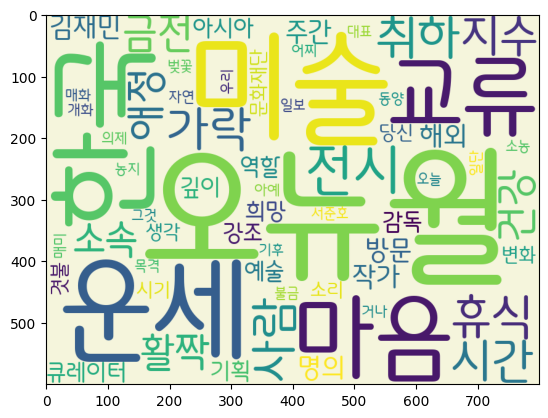

In [9]:
#######################################################
#추출된 데이터 워드클라우드화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "C:\Windows\Fonts\MalangmalangR.ttf"
wordcloud = WordCloud(font_path, background_color="beige", width=800, height=600)
wordcloud_freq = wordcloud.generate_from_frequencies(word_count)

plt.imshow(wordcloud_freq)
plt.show()

In [12]:
#######################################################
#검색+ json 파일 저장
json_result_all = []

# keyword = input("검색어를 입력하세용 :")
start = const_start
display = const_display

json_result = searchNaverNews(keyword, start, display)
while json_result != None:
    list_result = setNewSearchResult(json_result)
    json_result_all.extend(list_result)
    
    start += json_result['display']
    if json_result != None:
        print(f"{keyword}[{start}] : 검색 요청 완료")
    else:
        print(f"{keyword}[{start}] : 실패...")
        
saveSearchResult(f"{keyword}_news.json", json_result_all)

#######################################################


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [ ]:
################### main ######################
#1. 검색어 입력
#2. 검색결과 저장
#3. 워드클라우드화

In [ ]:
import os
import sys
import urllib.request
import json
import datetime
import re

from konlpy.tag import Okt
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# 상수 데이터 설정
client_id = "8DsCtOkhPlgBYLeuNgpG"
client_secret = "x33pj1vVn2"
const_url = "https://openapi.naver.com/v1/search/news?query=" # JSON 결과
const_start = 1
const_display = 100

In [ ]:
#######################################################
#네이버 뉴스를 검색하여, json형태로 검색 결과 return
def searchNaverNews(keyword, start, display):

# query string 생성
    encText = urllib.parse.quote(keyword)
    reqUrl = const_url+f"{encText}&start={start}&display={display}"
    
# Request 객체 생성
    request = urllib.request.Request(reqUrl)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    
# Request 객체의 urlopen을 실행하여 Response 받기
    result_json = None
    try:
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
# Response 객체에서 검색 결과 얻어서 json으로 변환하기
        if(rescode==200):
            response_body = response.read()
            response_body_dec = response_body.decode('utf-8')
            result_json = json.loads(response_body_dec)
    except Exception as e:
        print(e)
        print(f"Error :{reqUrl}")

# 검색이 진행되는 상황 logging 하기
    if (result_json != None):
        print(f"{keyword} [{start}] : Search Request Succes")
    else:
        print(f"{keyword} [{start}] : Error~~~~~~~")
        
# JSON 형태의 검색 결과 return하기
    return result_json

#############################################################
# 파이썬 객체에서 검색 결과를 정리해서 리스트에 추가하기
def setNewSearchResult(result_all_list, current_result):
    cur_index = 1
    if result_all_list != []:
        cur_index = result_all_list[-1]['index'] + 1      
    for result in current_result['items']:
        result['index'] = cur_index
        result_all_list.append(result)
        cur_index += 1
        
#################################################
# Naver News Crawling 하여 list에 저장하기
def searchSetNaverNews(keyword):
    # 필요변수 초기화
    result_all = [] #검색 결과 저장 변수
    start = const_start
    display = const_display
    
    # 네이버 뉴스를 검색하여 리스트로 저장
    result_json = searchNaverNews(keyword, start, display) # 최초의 검색 실행
    # 응답데이터가 없을 때까지 반복
    while result_json != None:
        # 응답데이터를 리스트에 저장 
        setNewSearchResult(result_all, result_json)
        # start 값 증가 (검색 결과 수만큼)
        start += result_json['display'] 
        # 네이버 뉴스 검색
        result_json = searchNaverNews(keyword, start, display)
    
    return result_all

In [ ]:
#############################################################
# 리스트에 저장된 검색 결과를 json 파일로 저장하기
def saveSearchResult(filename, list_result_all):
    with open(filename, "w", encoding="utf8") as outfile:
        json_string = json.dumps(list_result_all, ensure_ascii=False, indent=4)
        outfile.write(json_string)
    print(f"{filename} Saved!!!!")

In [ ]:
#################################################
# 상위 n개의 명사만 추출
def getHighFreqNouns(keyword, result_list, number):
# 본문만 추출하여 정제
    total_result = ''
    for item in result_list:
        clean_data = re.sub(r'[\W]', ' ', item['description'])
        total_result += clean_data
# 명사 추출
    okt = Okt()
    total_result_noun = okt.nouns(total_result)
# 빈도수 상위 number개 추출
    count = Counter(total_result_noun)
    most_freq_words = dict()
    for word, counts in count.most_common(number):
        if (word != keyword) and (len(word) > 1):
            most_freq_words[word] = counts
    return most_freq_words

#################################################
# wordcloud로 시각화
def setWordCloud(result_freq):
    font_path = "C:\Windows\Fonts\malgun.ttf"
    wordcloud = WordCloud(font_path, background_color="ivory", width=800, height=600)
    wordcloud_freq = wordcloud.generate_from_frequencies(result_freq)

    plt.imshow(wordcloud_freq)
    plt.axis('off')
    plt.show()

#################################################
# 검색 결과에서 본문만 WordCloud 생성하기
def visualizeWordCloud(keyword, result_list):
# 상위 n개의 명사만 추출
    result_freq = getHighFreqNouns(keyword, result_list, 80)
# wordcloud로 시각화
    setWordCloud(result_freq)

In [ ]:
####################### main #####################
# 검색어 입력받기
keyword = input("검색어를 입력하세요 :")
# Naver News Crawling 하기
result_all_list = searchSetNaverNews(keyword)
# JSON 파일로 저장
saveSearchResult(f"{keyword}_news.json", result_all_list)
# 검색 결과에서 본문만 WordCloud 생성하기
visualizeWordCloud(keyword, result_all_list)